In [95]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Concatenate,concatenate, Dense, Flatten, Reshape
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [96]:
def chunk_data(filtered_signal_data_for_label_2, filtered_signal_data_for_label_3, filtered_signal_data_for_label_4):
    
    return (
        np.array([filtered_signal_data_for_label_2[i:i+segment_size] for i in range(0,len(filtered_signal_data_for_label_2) - segment_size + 1,overlap)]),
        np.array([filtered_signal_data_for_label_3[i:i+segment_size] for i in range(0,len(filtered_signal_data_for_label_3) - segment_size + 1,overlap)]),
        np.array([filtered_signal_data_for_label_4[i:i+segment_size] for i in range(0,len(filtered_signal_data_for_label_4) - segment_size + 1,overlap)]) 
    
    )

In [124]:
frequency=0
train_duration =40
overlap=0
# subject="S11"
subject = "S4"
signal= "TEMP"
root = "../Wesad/Dataset/WESAD/untitled folder/"
path = root+subject+".pkl"

for subject in ['S4']:
    print("Subject : ======= >> ", subject)
    if signal=="ACC":
        frequency= 32
    elif signal=="BVP":
        frequency= 64
    else:
        frequency= 4

    segment_size = train_duration*frequency
    if frequency==1:
        overlap=frequency
    else:
        overlap = int(0.5*frequency)

    with open(path, 'rb') as file:
        whole_signal = pickle.load(file, encoding='latin1')
        
    
    # data= whole_signal['signal']['wrist'][signal]
    data_eda= whole_signal['signal']['wrist']['EDA']
    data_temp= whole_signal['signal']['wrist']['TEMP']
    
    
    labels_chest = whole_signal["label"]
    
    labels_wrist = []
    for i in range(0, len(labels_chest), 700):
        for _ in range(frequency):
            labels_wrist.append(labels_chest[i])
            
    labels_wrist = np.array(labels_wrist)
    
#     labels_wrist = whole_signal["label"]
    
    
    filtered_indices_label_0 = np.where(labels_wrist == 0)  
    filtered_indices_label_0= filtered_indices_label_0[0]
    
    filtered_indices_label_1 = np.where(labels_wrist == 1)  
    filtered_indices_label_1= filtered_indices_label_1[0]
    
    
    filtered_indices_label_2 = np.where(labels_wrist == 2)  # 2= stress
    filtered_indices_label_2= filtered_indices_label_2[0]
    
    
    filtered_indices_label_3 = np.where(labels_wrist == 3) # 3 = amusement
    filtered_indices_label_3= filtered_indices_label_3[0]

    
    filtered_indices_label_4 = np.where(labels_wrist == 4) # 4 =
    filtered_indices_label_4 = filtered_indices_label_4[0]
    
    filtered_indices_label_5 = np.where(labels_wrist == 5)  
    filtered_indices_label_5= filtered_indices_label_5[0]
    
    filtered_indices_label_6 = np.where(labels_wrist == 6) 
    filtered_indices_label_6= filtered_indices_label_6[0]
    
    filtered_indices_label_7 = np.where(labels_wrist == 7)  
    filtered_indices_label_7= filtered_indices_label_7[0]
    
    
    eda_data_for_label_0 = data_eda[filtered_indices_label_0]
    eda_data_for_label_1 = data_eda[filtered_indices_label_1]
    eda_data_for_label_2 = data_eda[filtered_indices_label_2]
    eda_data_for_label_3 = data_eda[filtered_indices_label_3]
    eda_data_for_label_4 = data_eda[filtered_indices_label_4]
    eda_data_for_label_5 = data_eda[filtered_indices_label_5]
    eda_data_for_label_6 = data_eda[filtered_indices_label_6]
    eda_data_for_label_7 = data_eda[filtered_indices_label_7]
    
    
    temp_data_for_label_0 = data_temp[filtered_indices_label_0]
    temp_data_for_label_1 = data_temp[filtered_indices_label_1]
    temp_data_for_label_2 = data_temp[filtered_indices_label_2]
    temp_data_for_label_3 = data_temp[filtered_indices_label_3]
    temp_data_for_label_4 = data_temp[filtered_indices_label_4]
    temp_data_for_label_5 = data_temp[filtered_indices_label_5]
    temp_data_for_label_6 = data_temp[filtered_indices_label_6]
    temp_data_for_label_7 = data_temp[filtered_indices_label_7]
    
    print(eda_data_for_label_2.shape,temp_data_for_label_2.shape)
    
    
    eda_data_for_label_2 = eda_data_for_label_2[:-540]
    temp_data_for_label_2 = temp_data_for_label_2[:-540]
    
    print(eda_data_for_label_2.shape,temp_data_for_label_2.shape)
    
#     exclude_eda_data_for_test_from_label_2 = eda_data_for_label_2[:-200]
#     exclude_temp_data_for_test_from_label_2 = temp_data_for_label_2[:-200]
    
    

    
    data_eda_label_0 = np.array([eda_data_for_label_0[i:i + segment_size] for i in range(0, len(eda_data_for_label_0) - segment_size + 1, overlap)])
    data_eda_label_1 = np.array([eda_data_for_label_1[i:i + segment_size] for i in range(0, len(eda_data_for_label_1) - segment_size + 1, overlap)])
    data_eda_label_2 = np.array([eda_data_for_label_2[i:i + segment_size] for i in range(0, len(eda_data_for_label_2) - segment_size + 1, overlap)])
    data_eda_label_3 = np.array([eda_data_for_label_3[i:i + segment_size] for i in range(0, len(eda_data_for_label_3) - segment_size + 1, overlap)])
    data_eda_label_4 = np.array([eda_data_for_label_4[i:i + segment_size] for i in range(0, len(eda_data_for_label_4) - segment_size + 1, overlap)])
    data_eda_label_5 = np.array([eda_data_for_label_5[i:i + segment_size] for i in range(0, len(eda_data_for_label_5) - segment_size + 1, overlap)])
    data_eda_label_6 = np.array([eda_data_for_label_6[i:i + segment_size] for i in range(0, len(eda_data_for_label_6) - segment_size + 1, overlap)])
    data_eda_label_7 = np.array([eda_data_for_label_7[i:i + segment_size] for i in range(0, len(eda_data_for_label_7) - segment_size + 1, overlap)])

    data_temp_label_0 = np.array([temp_data_for_label_0[i:i + segment_size] for i in range(0, len(temp_data_for_label_0) - segment_size + 1, overlap)])
    data_temp_label_1 = np.array([temp_data_for_label_1[i:i + segment_size] for i in range(0, len(temp_data_for_label_1) - segment_size + 1, overlap)])
    data_temp_label_2 = np.array([temp_data_for_label_2[i:i + segment_size] for i in range(0, len(temp_data_for_label_2) - segment_size + 1, overlap)])
    data_temp_label_3 = np.array([temp_data_for_label_3[i:i + segment_size] for i in range(0, len(temp_data_for_label_3) - segment_size + 1, overlap)])
    data_temp_label_4 = np.array([temp_data_for_label_4[i:i + segment_size] for i in range(0, len(temp_data_for_label_4) - segment_size + 1, overlap)])
    data_temp_label_5 = np.array([temp_data_for_label_5[i:i + segment_size] for i in range(0, len(temp_data_for_label_5) - segment_size + 1, overlap)])
    data_temp_label_6 = np.array([temp_data_for_label_6[i:i + segment_size] for i in range(0, len(temp_data_for_label_6) - segment_size + 1, overlap)])
    data_temp_label_7 = np.array([temp_data_for_label_7[i:i + segment_size] for i in range(0, len(temp_data_for_label_7) - segment_size + 1, overlap)])


    
    
    data_eda= np.concatenate((data_eda_label_0,data_eda_label_1,data_eda_label_2,data_eda_label_3,
                              data_eda_label_4,data_eda_label_5,data_eda_label_6),axis=0)
    
    data_temp= np.concatenate((data_temp_label_0,data_temp_label_1,data_temp_label_2,data_temp_label_3,
                              data_temp_label_4,data_temp_label_5,data_temp_label_6),axis=0)
    

    


Subject : ======= >>  S4
(2540, 1) (2540, 1)
(2000, 1) (2000, 1)


In [ ]:
for subject in ['S4']:
    print("Subject : ======= >> ", subject)
    if signal=="ACC":
        frequency= 32
    elif signal=="BVP":
        frequency= 64
    else:
        frequency= 4

    segment_size = train_duration*frequency
    if frequency==1:
        overlap=frequency
    else:
        overlap = int(0.5*frequency)

    with open(path, 'rb') as file:
        whole_signal = pickle.load(file, encoding='latin1')
        
    
    # data= whole_signal['signal']['wrist'][signal]
    data_eda= whole_signal['signal']['wrist']['EDA'].flatten()
    data_temp= whole_signal['signal']['wrist']['TEMP'].flatten()
    
    
    labels_chest = whole_signal["label"]
    
    labels_wrist = []
    for i in range(0, len(labels_chest), 700):
        for _ in range(frequency):
            labels_wrist.append(labels_chest[i])
            
    labels_wrist = np.array(labels_wrist)
    
    


In [127]:
pd.read_csv("eda.csv").shape,pd.read_csv("temp.csv").shape


((25692, 2), (25692, 2))

In [132]:
frequency=4
train_duration =10


segment_size = train_duration*frequency

data_eda=pd.read_csv("train_eda.csv",usecols=[0])
data_eda = data_eda["Signal"].values
data_eda = np.array([[item] for item in data_eda])

data_temp= pd.read_csv("train_temp.csv",usecols=[0])
data_temp = data_temp["Signal"].values
data_temp = np.array([[item] for item in data_temp])


data_eda = np.array([data_eda[i:i + segment_size] for i in range(0, len(data_eda) - segment_size + 1, overlap)])
data_temp = np.array([data_temp[i:i + segment_size] for i in range(0, len(data_temp) - segment_size + 1, overlap)])


In [133]:
data_eda.shape, data_temp.shape

((12472, 40, 1), (12472, 40, 1))

In [136]:


class RandomMaskingLayer(tf.keras.layers.Layer):
    def __init__(self, masking_rate=0.2, **kwargs):
        super(RandomMaskingLayer, self).__init__(**kwargs)
        self.masking_rate = masking_rate

    def call(self, inputs, training=None):
        if training:
            mask = tf.random.uniform(shape=tf.shape(inputs)) > self.masking_rate
            return inputs * tf.cast(mask, tf.float32)
        return inputs

    def get_config(self):
        config = super(RandomMaskingLayer, self).get_config()
        config.update({"masking_rate": self.masking_rate})
        return config


def create_masked_multimodal_autoencoder(time_steps):
    # Input layers for each modality
    input_eda = Input(shape=(time_steps, 1), name='input_eda')
    input_temp = Input(shape=(time_steps, 1), name='input_temp')

    # Masking layers
    masked_eda = RandomMaskingLayer(masking_rate=0.2)(input_eda)
    masked_temp = RandomMaskingLayer(masking_rate=0.2)(input_temp)

    # First branch - EDA
    x_eda = Conv1D(32, 3, activation='relu', padding='same')(masked_eda)
    x_eda = MaxPooling1D(2, padding='same')(x_eda)
    x_eda = Conv1D(64, 3, activation='relu', padding='same')(x_eda)
    x_eda = MaxPooling1D(2, padding='same')(x_eda)
    encoded_eda = Conv1D(128, 3, activation='relu', padding='same')(x_eda)
#     flatten_eda = Flatten()(encoded_eda)

    # Second branch - ECG
    x_temp = Conv1D(32, 3, activation='relu', padding='same')(masked_temp)
    x_temp = MaxPooling1D(2, padding='same')(x_temp)
    x_temp = Conv1D(64, 3, activation='relu', padding='same')(x_temp)
    x_temp = MaxPooling1D(2, padding='same')(x_temp)
    encoded_temp = Conv1D(128, 3, activation='relu', padding='same')(x_temp)
#     flatten_eda = Flatten()(encoded_eda)

    # Combine branches
    combined = concatenate([Flatten()(encoded_eda), Flatten()(encoded_temp)])
    
    
    flattened_size_per_branch = (time_steps // 4) * 128  # Example calculation based on your network structure
    total_flattened_size = 2 * flattened_size_per_branch
    print("Total: ",total_flattened_size)

    # Fully connected layers
    fc = Dense(total_flattened_size, activation='relu')(combined)
    print("Fc Shape", fc.shape)
    fc = Dense(time_steps * 128, activation='relu')(fc)  # Adjust the size to match the decoder's input
    print("Fc Shape", fc.shape)
    reshaped_size = total_flattened_size  # This should be 5120 as per your input shape
    new_shape = (time_steps, 128)  # New shape calculated to maintain the same number of elements
    print("New Shape, :",new_shape)
    # Apply the Reshape layer
    reshaped = Reshape(new_shape)(fc)
    print("Decoder")
    from tensorflow.keras.layers import Lambda
    # Decoder
    x_combined = Conv1D(128, 3, activation='relu', padding='same')(reshaped)
    x_combined = UpSampling1D(2)(x_combined)  # Upsampling
    x_combined = Conv1D(64, 3, activation='relu', padding='same')(x_combined)
    x_combined = UpSampling1D(2)(x_combined)  # Upsampling

    # Crop the output to the correct size
    # Assuming you need to crop from 80 to 40
    cropped_output = Lambda(lambda x: x[:, :time_steps, :])(x_combined)

    decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(cropped_output)


    # Define the model
    autoencoder = Model(inputs=[input_eda, input_temp], outputs=decoded)

    return autoencoder

# Instantiate the model
time_steps = segment_size  # Replace with the actual length of your time series
autoencoder = create_masked_multimodal_autoencoder(time_steps)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


Total:  2560
Fc Shape (None, 2560)
Fc Shape (None, 5120)
New Shape, : (40, 128)
Decoder


In [137]:
history = autoencoder.fit(
    [data_eda, data_temp],  # Input data
    data_eda,  # Target data for both EDA and ECG
    epochs=10,
    batch_size=128
)

Epoch 1/10


2023-11-26 20:54:21.367453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 31s 193ms/step - loss: 0.2090
Epoch 2/10
98/98 [==============================] - 6s 56ms/step - loss: 0.1842
Epoch 3/10
98/98 [==============================] - 5s 50ms/step - loss: 0.1841
Epoch 4/10
98/98 [==============================] - 5s 50ms/step - loss: 0.1840
Epoch 5/10
98/98 [==============================] - 5s 46ms/step - loss: 0.1840
Epoch 6/10
98/98 [==============================] - 5s 47ms/step - loss: 0.1840
Epoch 7/10
98/98 [==============================] - 4s 44ms/step - loss: 0.1840
Epoch 8/10
98/98 [==============================] - 4s 44ms/step - loss: 0.1840
Epoch 9/10
98/98 [==============================] - 4s 44ms/step - loss: 0.1840
Epoch 10/10
98/98 [==============================] - 5s 46ms/step - loss: 0.1840


In [151]:
autoencoder.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_eda (InputLayer)         [(None, 40, 1)]      0           []                               
                                                                                                  
 input_temp (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                                  
 random_masking_layer_12 (Rando  (None, 40, 1)       0           ['input_eda[0][0]']              
 mMaskingLayer)                                                                                   
                                                                                                  
 random_masking_layer_13 (Rando  (None, 40, 1)       0           ['input_temp[0][0]']      

In [147]:
autoencoder.save('model.h5')


In [213]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten, concatenate

def create_supervised_model(time_steps, num_classes):
    # Create new input layers
    input_eda = Input(shape=(time_steps, 1), name='input_eda')
    input_temp = Input(shape=(time_steps, 1), name='input_temp')

    # First branch - EDA
    x_eda = Conv1D(32, 3, activation='relu', padding='same')(input_eda)
    x_eda = MaxPooling1D(2, padding='same')(x_eda)
    x_eda = Conv1D(64, 3, activation='relu', padding='same')(x_eda)
    x_eda = MaxPooling1D(2, padding='same')(x_eda)
    encoded_eda = Conv1D(128, 3, activation='relu', padding='same')(x_eda)

    # Second branch - Temp
    x_temp = Conv1D(32, 3, activation='relu', padding='same')(input_temp)
    x_temp = MaxPooling1D(2, padding='same')(x_temp)
    x_temp = Conv1D(64, 3, activation='relu', padding='same')(x_temp)
    x_temp = MaxPooling1D(2, padding='same')(x_temp)
    encoded_temp = Conv1D(128, 3, activation='relu', padding='same')(x_temp)

    # Combine the outputs from the EDA and Temp encoders
    combined = concatenate([encoded_eda, encoded_temp])

    # Flatten and add dense layers for classification
    x = Flatten()(combined)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(num_classes, activation='linear')(x)
    
    

    # Create the model
    model = Model(inputs=[input_eda, input_temp], outputs=output)
    return model

# Define model parameters
time_steps = 40  # Adjust to match the length of your time series data
num_classes = 1  # Adjust based on your dataset

# Create the model
supervised_model = create_supervised_model(time_steps, num_classes)

# Compile the model
# supervised_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

supervised_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Model summary
# supervised_model.summary()


In [227]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten, concatenate

def create_fine_tuning_model(pretrained_model, time_steps, num_classes):
    # Create new input layers
    input_eda = Input(shape=(time_steps, 1), name='new_input_eda')
    input_temp = Input(shape=(time_steps, 1), name='new_input_temp')

    # First branch - EDA
    layer_eda_1 = Conv1D(32, 3, activation='relu', padding='same')
    x_eda = layer_eda_1(input_eda)
    layer_eda_1.set_weights(pretrained_model.get_layer(name='conv1d_84').get_weights())
    x_eda = MaxPooling1D(2, padding='same')(x_eda)

    layer_eda_2 = Conv1D(64, 3, activation='relu', padding='same')
    x_eda = layer_eda_2(x_eda)
    layer_eda_2.set_weights(pretrained_model.get_layer(name='conv1d_85').get_weights())  # Corrected layer name
    x_eda = MaxPooling1D(2, padding='same')(x_eda)

    layer_eda_3 = Conv1D(128, 3, activation='relu', padding='same')
    x_eda = layer_eda_3(x_eda)
    layer_eda_3.set_weights(pretrained_model.get_layer(name='conv1d_86').get_weights())  # Corrected layer name

    # Second branch - Temp
    layer_temp_1 = Conv1D(32, 3, activation='relu', padding='same')
    x_temp = layer_temp_1(input_temp)
    layer_temp_1.set_weights(pretrained_model.get_layer(name='conv1d_87').get_weights())
    x_temp = MaxPooling1D(2, padding='same')(x_temp)

    layer_temp_2 = Conv1D(64, 3, activation='relu', padding='same')
    x_temp = layer_temp_2(x_temp)
    layer_temp_2.set_weights(pretrained_model.get_layer(name='conv1d_88').get_weights())  # Corrected layer name
    x_temp = MaxPooling1D(2, padding='same')(x_temp)

    layer_temp_3 = Conv1D(128, 3, activation='relu', padding='same')
    x_temp = layer_temp_3(x_temp)
    layer_temp_3.set_weights(pretrained_model.get_layer(name='conv1d_89').get_weights())

    # Combine the outputs from the EDA and Temp encoders
    combined = concatenate([x_eda, x_temp])

    # Flatten and add new trainable layers for fine-tuning
    x = Flatten()(combined)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(num_classes, activation='linear')(x)

    # Create the fine-tuning model
    fine_tune_model = Model(inputs=[input_eda, input_temp], outputs=output)

    # Optionally, freeze the layers from the pretrained model
    for layer in fine_tune_model.layers[:-3]:
        layer.trainable = False

    return fine_tune_model

time_steps =40

# Load the pretrained autoencoder
pretrained_autoencoder = tf.keras.models.load_model('model.h5', custom_objects={'RandomMaskingLayer': RandomMaskingLayer})

# Number of classes for the fine-tuning task
num_classes = 1

# Create the fine-tuning model
fine_tune_model = create_fine_tuning_model(pretrained_autoencoder, time_steps, num_classes)
# fine_tune_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fine_tune_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


In [228]:
time_steps

40

In [205]:
def chunk_data(filtered_signal_data_for_label_2, filtered_signal_data_for_label_3, filtered_signal_data_for_label_4):
    
    return (
        np.array([filtered_signal_data_for_label_2[i:i+segment_size] for i in range(0,len(filtered_signal_data_for_label_2) - segment_size + 1,overlap)]),
        np.array([filtered_signal_data_for_label_3[i:i+segment_size] for i in range(0,len(filtered_signal_data_for_label_3) - segment_size + 1,overlap)]),
        np.array([filtered_signal_data_for_label_4[i:i+segment_size] for i in range(0,len(filtered_signal_data_for_label_4) - segment_size + 1,overlap)]) 
    
    )
    
    
def build_data_with_forecasting(signal,window,output_length, overlap):
    X=[]
    y=[]
    start=0
    while (True):
        x1=signal[start:start+window]
        output=signal[start+window:start+window+output_length] # 10 points
        if (len(output)!=output_length):
            break
        X.append(x1)
        y.append(output)
        start=start+overlap
    return X

def process_signal(data,frequency, labels_chest,train_duration,output_length, overlap):
    labels_wrist = []
    for i in range(0, len(labels_chest), 700):
        for _ in range(frequency):
            labels_wrist.append(labels_chest[i])
    labels_wrist = np.array(labels_wrist)
    
    filtered_indices_label_2 = np.where(labels_wrist == 2)  # 2= stress
    filtered_indices_label_2= filtered_indices_label_2[0]
    filtered_indices_label_3 = np.where(labels_wrist == 3) # 3 = amusement
    filtered_indices_label_3= filtered_indices_label_3[0]
    filtered_indices_label_4 = np.where(labels_wrist == 4) # 4 =
    filtered_indices_label_4 = filtered_indices_label_4[0]
    
    filtered_indices_label_7 = np.where(labels_wrist == 7) # 4 =
    filtered_indices_label_7 = filtered_indices_label_7[0]
    
    filtered_signal_data_for_label_2 = data[filtered_indices_label_2]
    filtered_signal_data_for_label_3 = data[filtered_indices_label_3]
    filtered_signal_data_for_label_4 = data[filtered_indices_label_4]
    
    filtered_signal_data_for_label_7 = data[filtered_indices_label_7]
    
#     data_label_2, data_label_3, data_label_4 = chunk_data(filtered_signal_data_for_label_2, filtered_signal_data_for_label_3, filtered_signal_data_for_label_4)
    data_label_2 = build_data_with_forecasting(filtered_signal_data_for_label_2,train_duration*frequency,output_length, overlap)
    data_label_3 = build_data_with_forecasting(filtered_signal_data_for_label_3,train_duration*frequency,output_length, overlap)
    data_label_4 = build_data_with_forecasting(filtered_signal_data_for_label_4,train_duration*frequency,output_length, overlap)
    
    test_no_stress = build_data_with_forecasting(filtered_signal_data_for_label_7,train_duration*frequency,output_length, overlap)

    
    return data_label_2, data_label_3, data_label_4, test_no_stress


import numpy as np

def balance_data(data_label_2, data_label_3, data_label_4):
    while True:
        len_2, len_3, len_4 = len(data_label_2), len(data_label_3), len(data_label_4)
        
        if len_3 + len_4 > len_2:
            # If combined length of data_label_3 and data_label_4 is greater, remove from them
            if len(data_label_3) > len(data_label_4):
                idx_to_remove = np.random.randint(len(data_label_3))
                data_label_3 = np.delete(data_label_3, idx_to_remove, axis=0)
            else:
                idx_to_remove = np.random.randint(len(data_label_4))
                data_label_4 = np.delete(data_label_4, idx_to_remove, axis=0)
                
        elif len_2 > len_3 + len_4:
            # If length of data_label_2 is greater, remove from it
            idx_to_remove = np.random.randint(len(data_label_2))
            data_label_2 = np.delete(data_label_2, idx_to_remove, axis=0)
            
        else:
            # If lengths are balanced, exit the loop
            break
            
    return data_label_2, data_label_3, data_label_4





    
    
    
def make_data_for_pt(output_dir, X_train, X_test, y_train, y_test, X_val,y_val ):
    dat_dict = dict()
    dat_dict["samples"] = torch.from_numpy(X_train)
    dat_dict["labels"] = torch.from_numpy(y_train)
    torch.save(dat_dict, os.path.join(output_dir, "train.pt"))

    dat_dict = dict()
    dat_dict["samples"] = torch.from_numpy(X_val)
    dat_dict["labels"] = torch.from_numpy(y_val)
    torch.save(dat_dict, os.path.join(output_dir, "val.pt"))

    dat_dict = dict()
    dat_dict["samples"] = torch.from_numpy(X_test)
    dat_dict["labels"] = torch.from_numpy(y_test)
    torch.save(dat_dict, os.path.join(output_dir, "test.pt"))
    
def get_frequency(signal):
    if signal=="ACC":
        frequency= 32
    elif signal=="BVP":
        frequency= 64
    else:
        frequency= 4
        
    return frequency


def training_data_based_on_data_points(n_samples_per_class,train_eda,train_temp,y_train,mse):
    
    if mse==True:

        n_samples_per_class = int(n_samples_per_class/2)

        # Separate the training set into classes
        class_0_indices = np.where(y_train == 0)[0]
        class_1_indices = np.where(y_train == 1)[0]

        # Randomly choose 5 indices from each class
    #     np.random.seed(42)  # for reproducibility
        selected_class_0_indices = np.random.choice(class_0_indices, n_samples_per_class, replace=False)
        selected_class_1_indices = np.random.choice(class_1_indices, n_samples_per_class, replace=False)

        # Combine the indices
        selected_indices = np.concatenate((selected_class_0_indices, selected_class_1_indices))

        # Extract the corresponding data points and labels
        selected_X_eda_train = train_eda[selected_indices]
        selected_X_temp_train = train_temp[selected_indices]
        selected_y_train = y_train[selected_indices]

        return selected_X_eda_train,selected_X_temp_train, selected_y_train
    else:
        
        n_samples_per_class = int(n_samples_per_class/2)

        # Separate the training set into classes
        class_0_indices = np.where(y_train == 0)[0]
        class_1_indices = np.where(y_train == 0.25)[0]

        # Randomly choose 5 indices from each class
    #     np.random.seed(42)  # for reproducibility
        selected_class_0_indices = np.random.choice(class_0_indices, n_samples_per_class, replace=False)
        selected_class_1_indices = np.random.choice(class_1_indices, n_samples_per_class, replace=False)

        # Combine the indices
        selected_indices = np.concatenate((selected_class_0_indices, selected_class_1_indices))

        # Extract the corresponding data points and labels
        selected_X_eda_train = train_eda[selected_indices]
        selected_X_temp_train = train_temp[selected_indices]
        selected_y_train = y_train[selected_indices]

        return selected_X_eda_train,selected_X_temp_train, selected_y_train
        
    
    
    

In [192]:
# frequency=0
train_duration =40
# overlap=2
subject="S4"
signal= "TEMP"
root = "../Wesad/Dataset/WESAD/untitled folder/"
path = root+subject+".pkl"



if signal=="ACC":
    frequency= 32
elif signal=="BVP":
    frequency= 64
else:
    frequency= 4

segment_size = train_duration*frequency
# frequency  = get_frequency(signal)
    
segment_size = train_duration*frequency

if frequency==1:
    overlap=frequency
else:
    overlap = int(0.5*frequency)
    
with open(path, 'rb') as file:
    whole_signal = pickle.load(file, encoding='latin1')




data_eda= whole_signal['signal']['wrist']['EDA']
data_temp= whole_signal['signal']['wrist']['TEMP']


labels_chest = whole_signal["label"]

labels_wrist = []
for i in range(0, len(labels_chest), 700):
    for _ in range(frequency):
        labels_wrist.append(labels_chest[i])

labels_wrist = np.array(labels_wrist)

#     labels_wrist = whole_signal["label"]


filtered_indices_label_0 = np.where(labels_wrist == 0)  
filtered_indices_label_0= filtered_indices_label_0[0]

filtered_indices_label_1 = np.where(labels_wrist == 1)  
filtered_indices_label_1= filtered_indices_label_1[0]


filtered_indices_label_2 = np.where(labels_wrist == 2)  # 2= stress
filtered_indices_label_2= filtered_indices_label_2[0]


filtered_indices_label_3 = np.where(labels_wrist == 3) # 3 = amusement
filtered_indices_label_3= filtered_indices_label_3[0]


filtered_indices_label_4 = np.where(labels_wrist == 4) # 4 =
filtered_indices_label_4 = filtered_indices_label_4[0]

filtered_indices_label_5 = np.where(labels_wrist == 5)  
filtered_indices_label_5= filtered_indices_label_5[0]

filtered_indices_label_6 = np.where(labels_wrist == 6) 
filtered_indices_label_6= filtered_indices_label_6[0]

filtered_indices_label_7 = np.where(labels_wrist == 7)  
filtered_indices_label_7= filtered_indices_label_7[0]


eda_data_for_label_0 = data_eda[filtered_indices_label_0]
eda_data_for_label_1 = data_eda[filtered_indices_label_1]
eda_data_for_label_2 = data_eda[filtered_indices_label_2]
eda_data_for_label_3 = data_eda[filtered_indices_label_3]
eda_data_for_label_4 = data_eda[filtered_indices_label_4]
eda_data_for_label_5 = data_eda[filtered_indices_label_5]
eda_data_for_label_6 = data_eda[filtered_indices_label_6]
eda_data_for_label_7 = data_eda[filtered_indices_label_7]


temp_data_for_label_0 = data_temp[filtered_indices_label_0]
temp_data_for_label_1 = data_temp[filtered_indices_label_1]
temp_data_for_label_2 = data_temp[filtered_indices_label_2]
temp_data_for_label_3 = data_temp[filtered_indices_label_3]
temp_data_for_label_4 = data_temp[filtered_indices_label_4]
temp_data_for_label_5 = data_temp[filtered_indices_label_5]
temp_data_for_label_6 = data_temp[filtered_indices_label_6]
temp_data_for_label_7 = data_temp[filtered_indices_label_7]

print(eda_data_for_label_2.shape,temp_data_for_label_2.shape)


test_stress_eda = eda_data_for_label_2[-540:]
test_stress_eda = np.array([test_stress_eda[i:i + segment_size] for i in range(0, len(test_stress_eda) - segment_size + 1, overlap)])
test_stress_temp = temp_data_for_label_2[-540:]
test_stress_temp = np.array([test_stress_temp[i:i + segment_size] for i in range(0, len(test_stress_temp) - segment_size + 1, overlap)])

print(test_eda_label_2.shape, test_temp_label_2.shape)


eda_data_for_label_2 = eda_data_for_label_2[:-540]
temp_data_for_label_2 = temp_data_for_label_2[:-540]


print(eda_data_for_label_2.shape,temp_data_for_label_2.shape)



data_eda_label_0 = np.array([eda_data_for_label_0[i:i + segment_size] for i in range(0, len(eda_data_for_label_0) - segment_size + 1, overlap)])
data_eda_label_1 = np.array([eda_data_for_label_1[i:i + segment_size] for i in range(0, len(eda_data_for_label_1) - segment_size + 1, overlap)])
data_eda_label_2 = np.array([eda_data_for_label_2[i:i + segment_size] for i in range(0, len(eda_data_for_label_2) - segment_size + 1, overlap)])
data_eda_label_3 = np.array([eda_data_for_label_3[i:i + segment_size] for i in range(0, len(eda_data_for_label_3) - segment_size + 1, overlap)])
data_eda_label_4 = np.array([eda_data_for_label_4[i:i + segment_size] for i in range(0, len(eda_data_for_label_4) - segment_size + 1, overlap)])
data_eda_label_5 = np.array([eda_data_for_label_5[i:i + segment_size] for i in range(0, len(eda_data_for_label_5) - segment_size + 1, overlap)])
data_eda_label_6 = np.array([eda_data_for_label_6[i:i + segment_size] for i in range(0, len(eda_data_for_label_6) - segment_size + 1, overlap)])
data_eda_label_7 = np.array([eda_data_for_label_7[i:i + segment_size] for i in range(0, len(eda_data_for_label_7) - segment_size + 1, overlap)])

data_temp_label_0 = np.array([temp_data_for_label_0[i:i + segment_size] for i in range(0, len(temp_data_for_label_0) - segment_size + 1, overlap)])
data_temp_label_1 = np.array([temp_data_for_label_1[i:i + segment_size] for i in range(0, len(temp_data_for_label_1) - segment_size + 1, overlap)])
data_temp_label_2 = np.array([temp_data_for_label_2[i:i + segment_size] for i in range(0, len(temp_data_for_label_2) - segment_size + 1, overlap)])
data_temp_label_3 = np.array([temp_data_for_label_3[i:i + segment_size] for i in range(0, len(temp_data_for_label_3) - segment_size + 1, overlap)])
data_temp_label_4 = np.array([temp_data_for_label_4[i:i + segment_size] for i in range(0, len(temp_data_for_label_4) - segment_size + 1, overlap)])
data_temp_label_5 = np.array([temp_data_for_label_5[i:i + segment_size] for i in range(0, len(temp_data_for_label_5) - segment_size + 1, overlap)])
data_temp_label_6 = np.array([temp_data_for_label_6[i:i + segment_size] for i in range(0, len(temp_data_for_label_6) - segment_size + 1, overlap)])
data_temp_label_7 = np.array([temp_data_for_label_7[i:i + segment_size] for i in range(0, len(temp_data_for_label_7) - segment_size + 1, overlap)])


train_no_stress_eda= np.concatenate((data_eda_label_3,data_eda_label_4), axis=0)
train_no_stress_temp= np.concatenate((data_temp_label_3,data_temp_label_4), axis=0)
train_no_stress_labels = np.array([0]*len(train_no_stress_eda))


train_stress_eda= data_eda_label_2.copy()
train_stress_temp= data_temp_label_2.copy()
train_stress_labels = np.array([1]*len(train_stress_eda))


train_eda = np.concatenate((train_stress_eda,train_no_stress_eda ), axis=0)
train_temp = np.concatenate((train_stress_temp,train_no_stress_temp ), axis=0)
train_labels = np.concatenate((train_stress_labels,train_no_stress_labels ), axis=0)


test_no_stress_eda = data_eda_label_7.copy()
test_no_stress_temp = data_temp_label_7.copy()
test_no_stress_labels = np.array([0]*len(test_no_stress_eda))

print("Test Stress Eda Shape: ", test_stress_eda.shape)
print("Test NO STRESS temp Shape: ", test_no_stress_eda.shape)



test_eda = np.concatenate((test_stress_eda,test_no_stress_eda ), axis=0)
test_temp = np.concatenate((test_stress_temp,test_no_stress_temp ), axis=0)
test_stress_labels = np.array([1]*len(test_stress_eda))
test_labels = np.concatenate((test_stress_labels,test_no_stress_labels ), axis=0)

    
print("Train Shape: ", train_eda.shape, train_temp.shape,train_labels.shape )
print("Test Shape: ", test_eda.shape, test_temp.shape,test_labels.shape )
    


# # ###  For SUPERISED TRAINING #####
# data_label_2_eda, data_label_3_eda, data_label_4_eda, test_no_stress_eda = process_signal(data_eda,frequency, labels_chest,train_duration,40,overlap)
# data_label_2_eda, data_label_3_eda, data_label_4_eda = balance_data(data_label_2_eda, data_label_3_eda, data_label_4_eda)


# data_label_2_temp, data_label_3_temp, data_label_4_temp, test_no_stress_temp = process_signal(data_temp,frequency, labels_chest,train_duration,40,overlap)
# data_label_2_temp, data_label_3_temp, data_label_4_temp = balance_data(data_label_2_temp, data_label_3_temp, data_label_4_temp)



# data_stress_eda = data_label_2_eda.copy()
# X_test_stress_eda = np.array(data_stress_eda[-200:])
# data_stress_eda = np.array(data_stress_eda[:-200]) # Updated data with  stress


# data_stress_temp = data_label_2_temp.copy()
# X_test_stress_temp = np.array(data_stress_temp[-200:])
# data_stress_temp =  np.array(data_stress_temp[:-200]) # Updated data with  stress

# train_label_stress = np.array([1]*len(data_stress_eda))
# test_label_stress = np.array([1]*len(X_test_stress_eda))

# ##### a=make no stress data


# data_no_stress_eda = np.concatenate((data_label_3_eda, data_label_4_eda),axis=0)
# # X_test_no_stress_eda = np.array(data_no_stress_eda[-200:])


# X_test_no_stress_eda = test_no_stress_eda.copy()

# data_no_stress_temp = np.concatenate((data_label_3_temp, data_label_4_temp),axis=0)
# # X_test_no_stress_temp = np.array(data_no_stress_temp[-200:])


# X_test_no_stress_temp = test_no_stress_temp.copy()

# # data_no_stress_eda = data_no_stress_eda[:-200] # Updated data with NO stress
# # data_no_stress_temp = data_no_stress_temp[:-200] # Updated data with NO stress

# train_no_label_stress = np.array([0]*len(data_no_stress_eda))
# test_label_no_stress = np.array([0]*len(X_test_no_stress_eda))

# train_eda= np.concatenate((data_stress_eda,data_no_stress_eda),axis=0)
# train_temp = np.concatenate((data_no_stress_eda,data_no_stress_temp),axis=0)
# train_labels = np.concatenate((train_label_stress,train_no_label_stress),axis=0)

# test_eda= np.concatenate((X_test_stress_eda,X_test_no_stress_eda),axis=0)
# test_temp = np.concatenate((X_test_no_stress_eda,X_test_no_stress_temp),axis=0)
# test_labels = np.concatenate((test_label_stress,test_label_no_stress),axis=0)





(2540, 1) (2540, 1)
(540, 1) (540, 1)
(2000, 1) (2000, 1)
Test Stress Eda Shape:  (191, 160, 1)
Test NO STRESS temp Shape:  (25, 160, 1)
Train Shape:  (3117, 160, 1) (3117, 160, 1) (3117,)
Test Shape:  (216, 160, 1) (216, 160, 1) (216,)


In [229]:
segment_size=40
train_stress_eda =pd.read_csv("train_stress_eda.csv",usecols=[0])
train_stress_eda=train_stress_eda.values
train_stress_eda= np.array([train_stress_eda[i:i + segment_size] for i in range(0, len(train_stress_eda) - segment_size + 1, overlap)])


train_no_stress_eda =pd.read_csv("train_no_stress_eda.csv",usecols=[0])
train_no_stress_eda=train_no_stress_eda.values
train_no_stress_eda= np.array([train_no_stress_eda[i:i + segment_size] for i in range(0, len(train_no_stress_eda) - segment_size + 1, overlap)])


test_stress_eda =pd.read_csv("test_stress_eda.csv",usecols=[0])
test_stress_eda=test_stress_eda.values
test_stress_eda= np.array([test_stress_eda[i:i + segment_size] for i in range(0, len(test_stress_eda) - segment_size + 1, overlap)])
# test_stress_eda_labels = np.array([1]*len(test_stress_eda))

test_no_stress_eda =pd.read_csv("test_no_stress_eda.csv",usecols=[0])
test_no_stress_eda=test_no_stress_eda.values
test_no_stress_eda= np.array([test_no_stress_eda[i:i + segment_size] for i in range(0, len(test_no_stress_eda) - segment_size + 1, overlap)])
# test_no_stress_eda_labels = np.array([0]*len(test_no_stress_eda))




In [230]:
train_stress_temp =pd.read_csv("train_stress_temp.csv",usecols=[0])
train_stress_temp=train_stress_temp.values
train_stress_temp= np.array([train_stress_temp[i:i + segment_size] for i in range(0, len(train_stress_temp) - segment_size + 1, overlap)])


train_no_stress_temp =pd.read_csv("train_no_stress_temp.csv",usecols=[0])
train_no_stress_temp=train_no_stress_temp.values
train_no_stress_temp= np.array([train_no_stress_temp[i:i + segment_size] for i in range(0, len(train_no_stress_temp) - segment_size + 1, overlap)])
# train_no_stress_labels = np.array([0]*len(train_no_stress_temp))


test_stress_temp =pd.read_csv("test_stress_temp.csv",usecols=[0])
test_stress_temp=test_stress_temp.values
test_stress_temp= np.array([test_stress_temp[i:i + segment_size] for i in range(0, len(test_stress_temp) - segment_size + 1, overlap)])
# test_stress_temp_labels = np.array([1]*len(test_stress_temp))

test_no_stress_temp =pd.read_csv("test_no_stress_temp.csv",usecols=[0])
test_no_stress_temp=test_no_stress_temp.values
test_no_stress_temp= np.array([test_no_stress_temp[i:i + segment_size] for i in range(0, len(test_no_stress_temp) - segment_size + 1, overlap)])
# test_no_stress_temp_labels = np.array([0]*len(test_no_stress_temp))


In [231]:
train_stress_labels = np.array([0.25]*len(train_stress_eda))
train_no_stress_labels = np.array([0]*len(train_no_stress_eda))
test_stress_labels = np.array([0.25]*len(test_stress_eda))
test_no_stress_labels = np.array([0]*len(test_no_stress_eda))

In [232]:
train_eda = np.concatenate((train_stress_eda,train_no_stress_eda),axis=0)
train_temp = np.concatenate((train_stress_temp,train_no_stress_temp),axis=0)
train_labels= np.concatenate((train_stress_labels,train_no_stress_labels),axis=0)


test_eda = np.concatenate((test_stress_eda,test_no_stress_eda),axis=0)
test_temp = np.concatenate((test_stress_temp,test_no_stress_temp),axis=0)
test_labels= np.concatenate((test_stress_labels,test_no_stress_labels),axis=0)


In [233]:
train_eda.shape

(3335, 40, 1)

In [236]:
all_df=[]
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
epoch = 5
ssl =[]
non_ssl=[]
for data_point in [10,20,30,40,50,60,70,80,90,100]:
    print("Data Point: ", data_point)
    for step in [1]:
        new_X_train_eda,new_X_train_temp, new_y_train = training_data_based_on_data_points(data_point,train_eda,train_temp,train_labels,False)
        history = fine_tune_model.fit(
                    [new_X_train_eda, new_X_train_temp],  # Model inputs as a list
                    new_y_train,                      # Training labels
                    batch_size=100,                # Batch size (adjust as needed)
                    epochs=epoch,                    # Number of epochs (adjust as needed)
        # Fraction of data to use as validation
                    verbose=1               # Verbosity mode
                )
#         predictions_finetune = fine_tune_model.predict([test_eda, test_temp],verbose=0)
#         predicted_labels_finetune = np.argmax(predictions_finetune, axis=1)
#         f1_finetune = f1_score(test_labels, predicted_labels_finetune, average='binary')  # Use 'binary' for binary classification
        loss, mse_ssl = fine_tune_model.evaluate([test_eda, test_temp], test_labels, verbose=0)
        rmse_ssl = abs(np.sqrt(mse_ssl))

        df_ssl = pd.DataFrame({
            'Subject':[subject],
            'Data Points':[data_point],
            'RMSE':[rmse_ssl]
        })
        ssl.append(df_ssl)
        print("SSL")
#         print(confusion_matrix(test_labels, predicted_labels_finetune))
        print("==============================")
        
        history = supervised_model.fit(
                        [new_X_train_eda, new_X_train_temp],  # Model inputs as a list
                        new_y_train,                      # Training labels
                        batch_size=1000,                # Batch size (adjust as needed)
                        epochs=epoch,                    # Number of epochs (adjust as needed)
                      # Fraction of data to use as validation
                        verbose=1                # Verbosity mode
                    )
        
#         predictions_supervised = supervised_model.predict([test_eda, test_temp],verbose=0)
#         predicted_labels_supervised = np.argmax(predictions_supervised, axis=1)
#         f1_supervised = f1_score(test_labels, predicted_labels_supervised, average='weighted')  # Use 'binary' for binary classification
        
        loss, mse_supervised = supervised_model.evaluate([test_eda, test_temp], test_labels, verbose=0)
        rmse_supervised = abs(np.sqrt(mse_supervised))
        df_non_ssl = pd.DataFrame({
            'Subject':[subject],
            'Data Points':[data_point],
            'RMSE':[rmse_supervised]
        })

        non_ssl.append(df_non_ssl)
        print("Supervised Training")
#         print(confusion_matrix(test_labels, predicted_labels_supervised))
        print("==============================")
        print()
        print()
        

        

Data Point:  10
Epoch 1/5
1/1 [==============================] - 0s 33ms/step - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 2/5
1/1 [==============================] - 0s 39ms/step - loss: 9.2072e-04 - mean_squared_error: 9.2072e-04
Epoch 3/5
1/1 [==============================] - 0s 44ms/step - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 4/5
1/1 [==============================] - 0s 51ms/step - loss: 0.0587 - mean_squared_error: 0.0587
Epoch 5/5
1/1 [==============================] - 0s 21ms/step - loss: 0.0619 - mean_squared_error: 0.0619
SSL
Epoch 1/5


2023-11-27 14:05:42.701245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 0.9788 - mean_squared_error: 0.9788
Epoch 2/5
1/1 [==============================] - 0s 173ms/step - loss: 17.2359 - mean_squared_error: 17.2359
Epoch 3/5
1/1 [==============================] - 0s 121ms/step - loss: 0.5101 - mean_squared_error: 0.5101
Epoch 4/5
1/1 [==============================] - 0s 39ms/step - loss: 1.5193 - mean_squared_error: 1.5193
Epoch 5/5
1/1 [==============================] - 0s 30ms/step - loss: 2.6928 - mean_squared_error: 2.6928


2023-11-27 14:05:48.302204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Supervised Training


Data Point:  20
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 2/5
1/1 [==============================] - 0s 48ms/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 3/5
1/1 [==============================] - 0s 33ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 5/5
1/1 [==============================] - 0s 28ms/step - loss: 0.0308 - mean_squared_error: 0.0308
SSL
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 1.9114 - mean_squared_error: 1.9114
Epoch 2/5
1/1 [==============================] - 0s 130ms/step - loss: 0.4792 - mean_squared_error: 0.4792
Epoch 3/5
1/1 [==============================] - 0s 152ms/step - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 4/5
1/1 [==============================] - 0s 94ms/step - loss: 0.5156 - mean_squared_error: 0.5156
Epoch 

In [237]:
x_ssl= pd.concat(ssl)
x_nonssl= pd.concat(non_ssl)

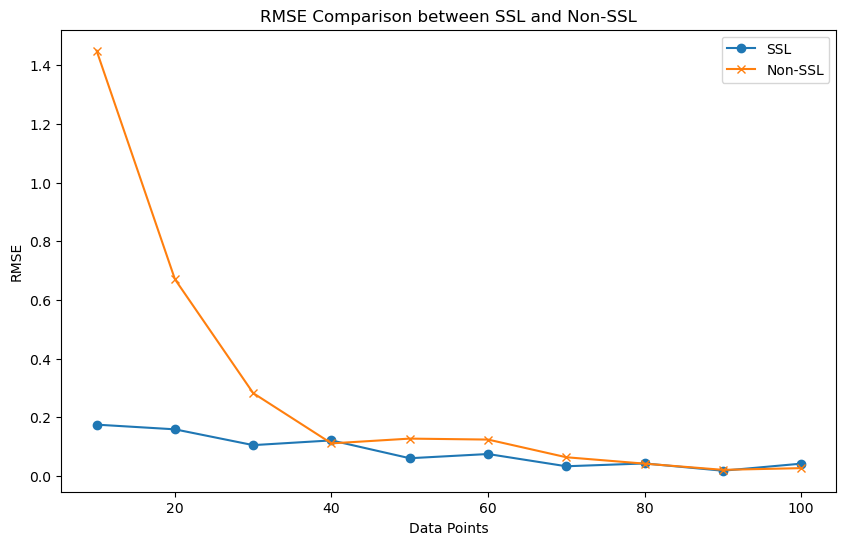

In [246]:
import matplotlib.pyplot as plt
df_ssl = x_ssl.copy()
df_non_ssl = x_nonssl.copy()
plt.figure(figsize=(10, 6))

plt.plot(df_ssl['Data Points'], df_ssl['RMSE'], label='SSL', marker='o')
plt.plot(df_non_ssl['Data Points'], df_non_ssl['RMSE'], label='Non-SSL', marker='x')
plt.xlabel('Data Points')
plt.ylabel('RMSE')
plt.title('RMSE Comparison between SSL and Non-SSL')
plt.legend()
plt.grid(False)
plt.show()

In [172]:

history = fine_tune_model.fit(
    [new_X_train_eda, new_X_train_temp],  # Model inputs as a list
    new_y_train,                      # Training labels
    batch_size=32,                # Batch size (adjust as needed)
    epochs=epoch,                    # Number of epochs (adjust as needed)
    validation_split=0.1,         # Fraction of data to use as validation
    verbose=1                     # Verbosity mode
)
loss, accuracy = fine_tune_model.evaluate(
    [test_eda, test_temp],  # Test inputs as a list
    test_labels,                     # Test labels
    verbose=1                   # Verbosity mode
)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

predictions = fine_tune_model.predict([test_eda, test_temp])
predicted_labels = np.argmax(predictions, axis=1)
f1 = f1_score(test_labels, predicted_labels, average='weighted')  # Use 'binary' for binary classification

print("F1 Score:", f1)


Epoch 1/5
2/2 [==============================] - 0s 53ms/step - loss: 8.5509e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
2/2 [==============================] - 0s 30ms/step - loss: 7.7143e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
2/2 [==============================] - 0s 33ms/step - loss: 7.0696e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
2/2 [==============================] - 0s 31ms/step - loss: 6.5641e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 8.0413e-05 - accuracy: 1.0000
Test loss: 8.041272667469457e-05
Test accuracy: 1.0
13/13 [==============================] - 0s 5ms/step
F1 Score: 1.0


In [173]:
history = supervised_model.fit(
    [new_X_train_eda, new_X_train_temp],  # Model inputs as a list
    new_y_train,                      # Training labels
    batch_size=32,                # Batch size (adjust as needed)
    epochs=epoch,                    # Number of epochs (adjust as needed)
    validation_split=0.1,         # Fraction of data to use as validation
    verbose=1                     # Verbosity mode
)

loss, accuracy = supervised_model.evaluate(
    [test_eda, test_temp],  # Test inputs as a list
    test_labels,                     # Test labels
    verbose=1                   # Verbosity mode
)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

predictions = supervised_model.predict([test_eda, test_temp])
predicted_labels = np.argmax(predictions, axis=1)
f1 = f1_score(test_labels, predicted_labels, average='weighted')  # Use 'binary' for binary classification

print("F1 Score:", f1)

Epoch 1/5
2/2 [==============================] - 6s 4s/step - loss: 6.9074e-06 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 2/5
2/2 [==============================] - 0s 44ms/step - loss: 4.5068e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
2/2 [==============================] - 0s 52ms/step - loss: 1.0861e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
2/2 [==============================] - 0s 45ms/step - loss: 1.7881e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 5.9605e-08 - accuracy: 1.0000
Test loss: 5.9604641222676946e-08
Test accuracy: 1.0


2023-11-23 20:22:16.163861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 2s 92ms/step
F1 Score: 1.0


((200, 40, 1), (200, 40, 1), (200, 40, 1), (200, 40, 1))

In [137]:
train_stress = [0]*len(data_no_stress_eda)

In [139]:
np.array(train_stress)

array([0, 0, 0, ..., 0, 0, 0])